<a href="https://colab.research.google.com/github/660710078/TopGun2025/blob/main/Pre_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing

In [11]:
!pip install ultralytics opencv-python-headless pillow PyYAML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00


In [17]:
import os
from ultralytics import YOLO
import cv2
from IPython.display import Image, display
import yaml
import matplotlib.pyplot as plt
import numpy as np

In [4]:
|from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
base_path = '/content/drive/MyDrive/drone_dataset'
yaml_path = f'{base_path}/data.yaml'

In [9]:
def check_dataset_structure(base_path):
    """
    ตรวจสอบโครงสร้าง dataset และนับจำนวนไฟล์
    """
    splits = ['train', 'valid']
    summary = {}

    for split in splits:
        img_dir = f'{base_path}/{split}/images'
        lbl_dir = f'{base_path}/{split}/labels'

        # check if folder exist
        if not os.path.exists(img_dir):
            print(f"Folder not founded: {img_dir}")
            continue
        if not os.path.exists(lbl_dir):
            print(f"Folder not founded: {lbl_dir}")
            continue

        # count files
        images = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        labels = [f for f in os.listdir(lbl_dir) if f.endswith('.txt')]

        num_images = len(images)
        num_labels = len(labels)

        summary[split] = {
            'images': num_images,
            'labels': num_labels,
            'match': num_images == num_labels
        }

        print(f"   Images: {num_images}")
        print(f"   Labels: {num_labels}")
        print(f"   Match: {'Yes' if num_images == num_labels else 'No'}")

    total_images = sum(s['images'] for s in summary.values())
    total_labels = sum(s['labels'] for s in summary.values())

    print("\n" + "="*60)
    print(f"summary:")
    print(f"   images count: {total_images}")
    print(f"   Labels count: {total_labels}")
    print("="*60 + "\n")

    return summary

In [13]:
dataset_summary = check_dataset_structure(base_path)

   Images: 1012
   Labels: 1012
   Match: Yes
   Images: 347
   Labels: 348
   Match: No

summary:
   images count: 1359
   Labels count: 1360



In [14]:
bgr = cv2.imread("/content/drive/MyDrive/drone_dataset/train/images/pic_235.jpg")

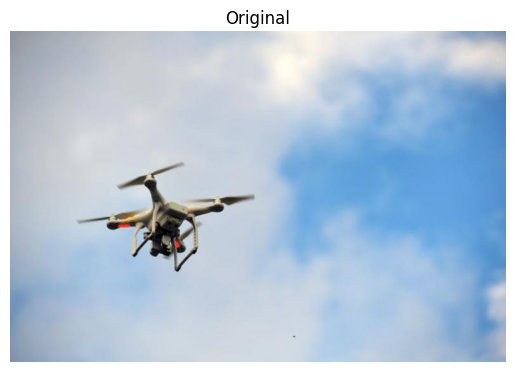

In [15]:
rgb =  cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

plt.imshow(rgb); plt.axis('off')
plt.title("Original")
plt.show()

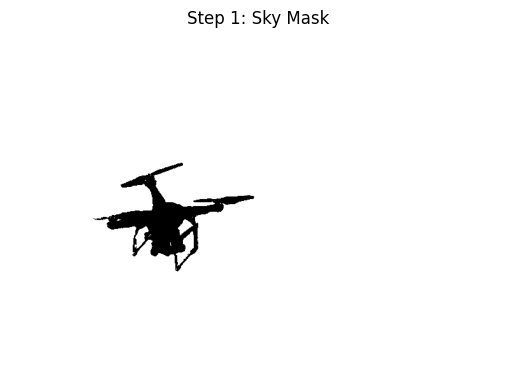

In [26]:
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)

blue_sky = (H>=90)&(H<=135)&(S>=0)&(V>=80)
clouds   = (S<=35) & (V>=180)

sky_mask = (blue_sky|clouds).astype(np.uint8)*255
plt.imshow(sky_mask, cmap='gray'); plt.axis('off'); plt.title("Step 1: Sky Mask"); plt.show()

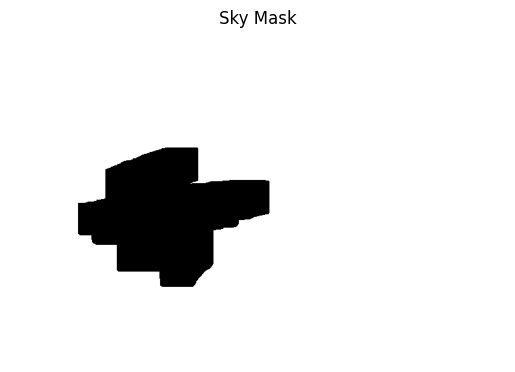

In [30]:
kernel = np.ones((3,3),np.uint8)
sky_mask = cv2.erode(sky_mask, kernel, iterations=8)
plt.imshow(sky_mask, cmap='gray'); plt.axis('off'); plt.title("Sky Mask"); plt.show()